### Importing the dataset and preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "../data/dataset/OR_AE2_Project_Adjusted.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')
df_original.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2


In [5]:
df = df_original.loc[df_original.index.repeat(df_original['Number_Of_Attendances'])].reset_index(drop=True)
df = df.drop(columns=['Number_Of_Attendances'])
df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4


### Plotting

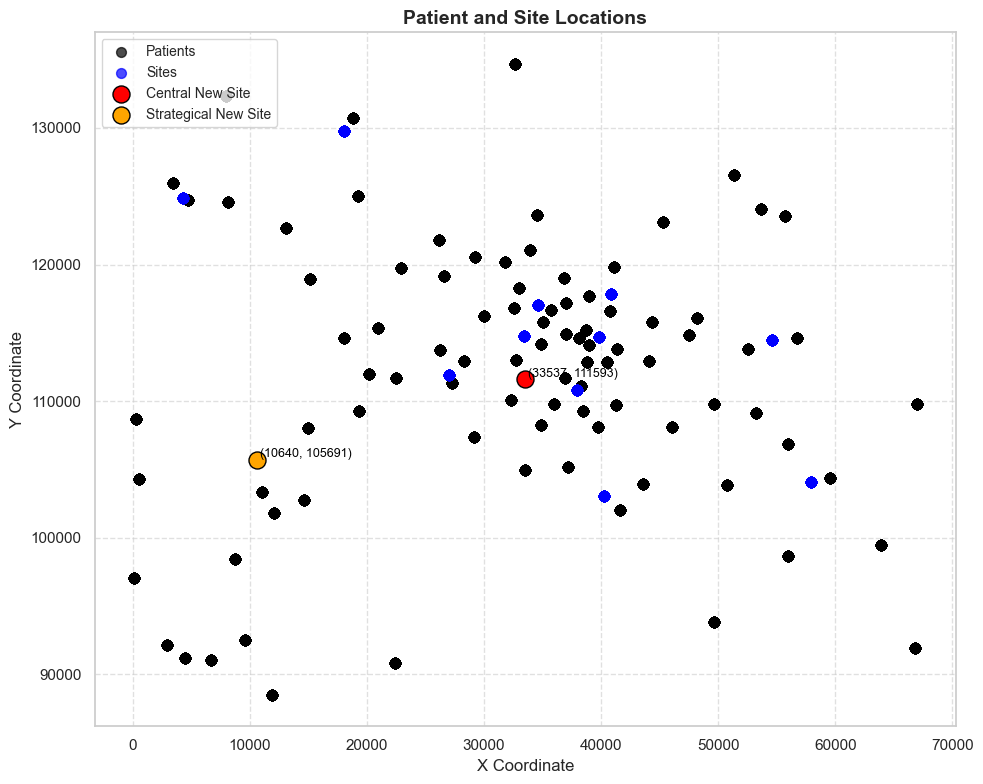

In [4]:
# New sites' coordinates
new_sites = [(33537, 111593), (10640, 105691)]


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(df['Pat_X'], df['Pat_Y'], color='black', label='Patients', s=50, alpha=0.7)
plt.scatter(df['Site_X'], df['Site_Y'], color='blue', label='Sites', s=50, alpha=0.7)
for coord in new_sites:
    if coord[0] == 33537:
        plt.scatter(coord[0], coord[1], color='red', label=f'Central New Site', s=150, edgecolor='black')
    else:
        plt.scatter(coord[0], coord[1], color='orange', label=f'Strategical New Site', s=150, edgecolor='black')
    
for coord in new_sites:
    plt.text(coord[0] + 200, coord[1] + 200, f'({coord[0]}, {coord[1]})', color='black', fontsize=9)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Patient and Site Locations', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


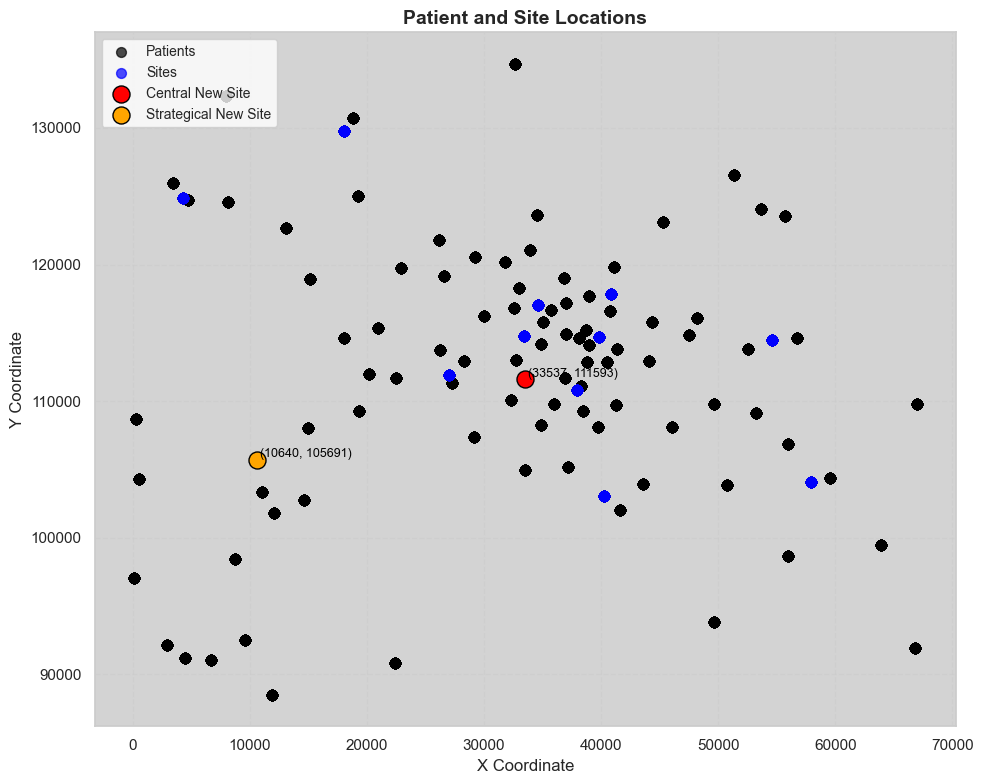

In [5]:
# New sites' coordinates
new_sites = [(33537, 111593), (10640, 105691)]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Set background color
plt.gca().set_facecolor('lightgray')  # Change 'lightgray' to any preferred color
plt.scatter(df['Pat_X'], df['Pat_Y'], color='black', label='Patients', s=50, alpha=0.7)
plt.scatter(df['Site_X'], df['Site_Y'], color='blue', label='Sites', s=50, alpha=0.7)

for coord in new_sites:
    if coord[0] == 33537:
        plt.scatter(coord[0], coord[1], color='red', label=f'Central New Site', s=150, edgecolor='black')
    else:
        plt.scatter(coord[0], coord[1], color='orange', label=f'Strategical New Site', s=150, edgecolor='black')

for coord in new_sites:
    plt.text(coord[0] + 200, coord[1] + 200, f'({coord[0]}, {coord[1]})', color='black', fontsize=9)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Patient and Site Locations', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Computing average distance

In [13]:
import numpy as np

# %%
# Function to calculate distance
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Sample 5000 patients
sample_df = df.sample(n=5000, random_state=42)

# Get site coordinates (including the specific new site)
site_coords = list(zip(df['Site_X'].unique(), df['Site_Y'].unique()))
site_coords.append((10640, 105691))

# Calculate the minimum distance to any site for each patient
sample_df['Min_Distance'] = sample_df.apply(
    lambda row: min(calculate_distance(row['Pat_X'], row['Pat_Y'], x, y) for x, y in site_coords),
    axis=1
)

# Compute the average minimum distance
average_min_distance = sample_df['Min_Distance'].mean()

print(f"Average distance of patients to the closest site (including the new site): {average_min_distance:.2f}")


Average distance of patients to the closest site (including the new site): 4094.20


In [11]:
import numpy as np

# %%
# Function to calculate distance
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Sample 5000 patients
sample_df = df.sample(n=5000, random_state=42)

# Get site coordinates (including the specific new site)
site_coords = list(zip(df['Site_X'].unique(), df['Site_Y'].unique()))
site_coords.append((33537, 111593))  # Add only the new site (33537, 111593)

# Calculate the minimum distance to any site for each patient
sample_df['Min_Distance'] = sample_df.apply(
    lambda row: min(calculate_distance(row['Pat_X'], row['Pat_Y'], x, y) for x, y in site_coords),
    axis=1
)

# Compute the average minimum distance
average_min_distance = sample_df['Min_Distance'].mean()

print(f"Average distance of patients to the closest site (including the new site): {average_min_distance:.2f}")


Average distance of patients to the closest site (including the new site): 4243.32


In [12]:
# Get site coordinates (including new sites)
site_coords = list(zip(df['Site_X'].unique(), df['Site_Y'].unique()))
site_coords.append((33537, 111593))
site_coords.append((10640, 105691))

# Calculate the minimum distance to any site for each patient
sample_df['Min_Distance'] = sample_df.apply(
    lambda row: min(calculate_distance(row['Pat_X'], row['Pat_Y'], x, y) for x, y in site_coords),
    axis=1
)

# Compute the average minimum distance
average_min_distance = sample_df['Min_Distance'].mean()

print(f"Average distance of patients to the closest site (including new sites): {average_min_distance:.2f}")


Average distance of patients to the closest site (including new sites): 4012.91
